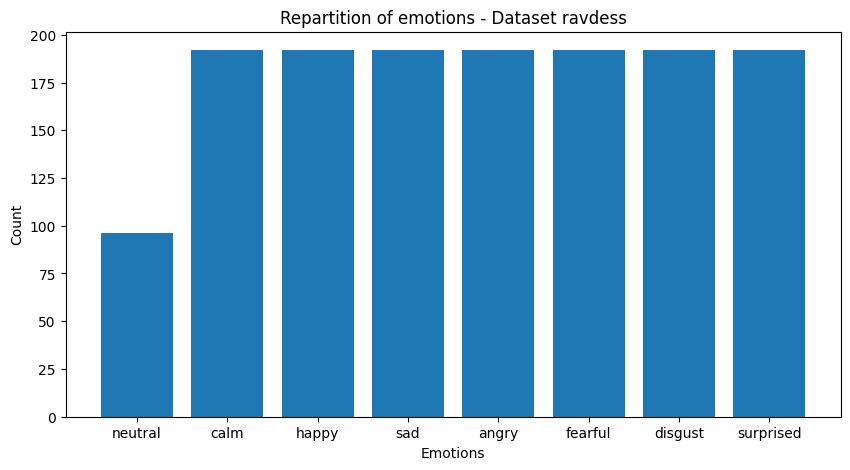

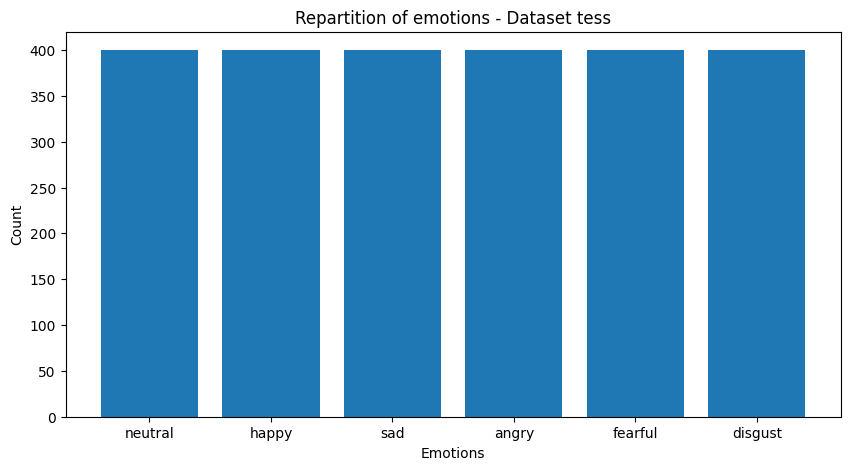

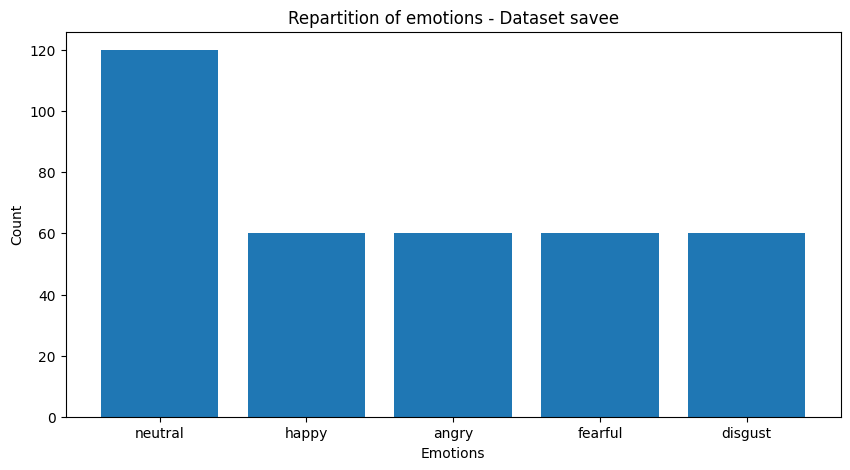

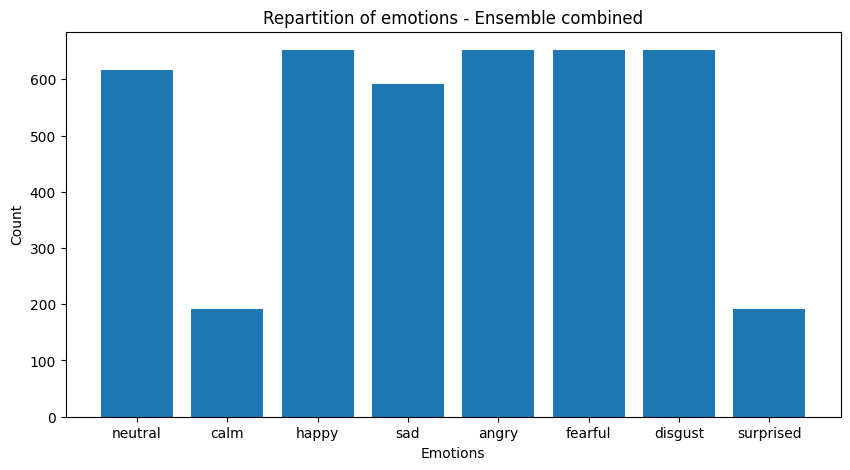

In [5]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Dossiers contenant les images des trois datasets
datasets_dirs = [
    "audio_representations/audio_representations_ravdess/spectrograms/",
    "audio_representations/audio_representations_Tess/spectrograms/",
    "audio_representations/audio_representations_savee/spectrograms/"
]

# Dictionnaire pour mapper les codes d'émotion à des labels
emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Fonction pour extraire les émotions des noms de fichiers
def extract_emotions(dataset_dir):
    emotions = []
    for file_name in os.listdir(dataset_dir):
        if file_name.endswith(".png"):
            try:
                emotion_code = file_name.split("-")[2]
                emotion = emotion_labels.get(emotion_code, "unknown")
                emotions.append(emotion)
            except IndexError:
                print(f"Nom de fichier invalide : {file_name}")
    return emotions

# Extraire les émotions pour chaque dataset
all_emotions = []
dataset_emotions = []

for dataset_dir in datasets_dirs:
    emotions = extract_emotions(dataset_dir)
    dataset_emotions.append(emotions)
    all_emotions.extend(emotions)

# Fonction pour tracer la répartition des émotions
def plot_emotion_distribution(emotions, title):
    emotion_counts = Counter(emotions)
    labels, values = zip(*emotion_counts.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel("Emotions")
    plt.ylabel("Count")
    plt.show()

# Tracer la répartition des émotions pour chaque dataset
dadaset=["ravdess","tess","savee"]
for i, emotions in enumerate(dataset_emotions):
    plot_emotion_distribution(emotions, f"Repartition of emotions - Dataset {dadaset[i]}")

# Tracer la répartition des émotions pour l'ensemble combiné
plot_emotion_distribution(all_emotions, "Repartition of emotions - Ensemble combined")

In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour générer un spectrogramme unique à partir d'un fichier audio
def generate_spectrogram_from_file(file_path, output_file):
    # Charger l'audio
    y, sr = librosa.load(file_path, sr=None)
    
    # Générer le spectrogramme
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(2.56, 2.56))  # Taille de l'image
    plt.axis('off')  # Masquer les axes
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    
    # Sauvegarder l'image
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

# Exemple d'utilisation
file_path = 'audio (2).wav'  # Remplacez ceci par le chemin réel du fichier audio
output_file = 'output_spectrogram.png'    # Spécifiez le chemin de sortie pour le spectrogramme

# Générer le spectrogramme
generate_spectrogram_from_file(file_path, output_file)

print(f"Spectrogramme généré et sauvegardé sous : {output_file}")


Spectrogramme généré et sauvegardé sous : output_spectrogram.png
